<a href="https://colab.research.google.com/github/emolmin/Algoritmos-ML/blob/main/Intro_k_Medias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al algoritmos de K-Medias**

Es un método de agrupamiento, el cual permite dividir los datos en grupos. Cada grupo contiene elementos con caracteristicas similares. Esto es, permite organizar elementos en función de la similitud de sus características.

**Generalidades del Algoritmo**

K-Medias (o K-Means en inglés) es un algoritmo no supervisado, donde a través de un proceso cíclico va organizando los datos en "K" grupos. El usuario debe decidir al inicio el valor de "K". También, el usuario puede decidir la métrica de similitud, si bien normalmente se usa una distancia euclidiana.

El algoritmos de K-Meadias se caracteriza por ser un método expluyente:
* Los datos sólo pueden pertenecer a un grupo


**El valor de K:** El número de grupos de un conjunto de datos depende de la naturaleza del problema bajo estudio. Por ellos es importante revisar los datos previamente y hacer pruebas con varios valores de "K". Existen algunos métodos que ayudan a encontrar este valos, como son el método de la silueta, el método de Daveis-Bouldin, entre otros.

"K" no sólo representa el número de grupos, también son los centroides de cada grupo.

**Criterios para un "buen" agrupamiento**

Encontramos varias ideas para evaluar un agrupamiento, sin embargo, no hay un criterio único y definitivo. En general, depende mucho de la aplicación o problema que se sesté tratando, así como del usuario.

Una guía que puede ayudar a evaluar un agrapamiento consiste en considerar los siguientes puntos:


*   La única fuente de información que tiene el algoritmos son los datos que recibe y la métrica de sismilitud que será usada.
*   Un buen clasificador es el que logra:
1.   **Alta similitud** entre datos del mismo grupo
2.   **Baja similitud** entre datos de distintos grupos


# Algoritmo de K-Medias
Es un proceso cíclico, y consta de los siguientes pasos:


1.   Definir el número de grupos "K".
2.   A partir del número de grupos, se inicializa la pocición de los "K"-centroides. Existen varias formas de inicialización: aleatoria, valores medios, valores extremos, etc.
3.   Asociar cada uno de los datos a uno y sólo uno de los K-centroides.
4.   Calcular las nuevas posiciones (coordenadas) de los K-centroides, en función de los datos asociados en el paso 3.
5.   Repetir el paso 3. y 4. con las nuevas posiciones de los centroides.
6. El ciclo termina a partir de alguno de los siguientes criterios: 1) se han realizado un número de ciclos predefinido, 2) Las nuevas posiciones del os centroides no cambian en varios ciclos sucesivos, 3) se ha superado un cierto tiempo de ejecución.
















Imagen del proceso.
https://drive.google.com/file/d/1Dwg2cfVuUu151k48uB0Fl9R6NT7M-E8o/view?usp=sharing
![Fig1](https://drive.google.com/uc?export=view&id=1Dwg2cfVuUu151k48uB0Fl9R6NT7M-E8o)


# **1. Métricas de Distancia**

Las más comunes son:


1.   Distancia Manhatan, Norma L1, o Minkowski con p=1
2.   Distancia Euclidiana, Norma L2, o Minkowski con p=2
3.   Distancia Minkowski con p $\geq$ 3

$$ d(\mathbf{A}, \mathbf{B}) = \left( \sum_{i=1}^{n} |A_i - B_i|^p \right)^{1/p} $$

---

Distancia Minkowski para (p=1): 7.0000
Distancia Minkowski para (p=2): 4.5826
Distancia Minkowski para (p=3): 4.1793
Distancia Minkowski para (p=4): 4.0648
Distancia Minkowski para (p=5): 4.0255
Distancia Minkowski para (p=6): 4.0105
Distancia Minkowski para (p=7): 4.0045
Distancia Minkowski para (p=8): 4.0020
Distancia Minkowski para (p=9): 4.0009
Distancia Minkowski para (p=10): 4.0004


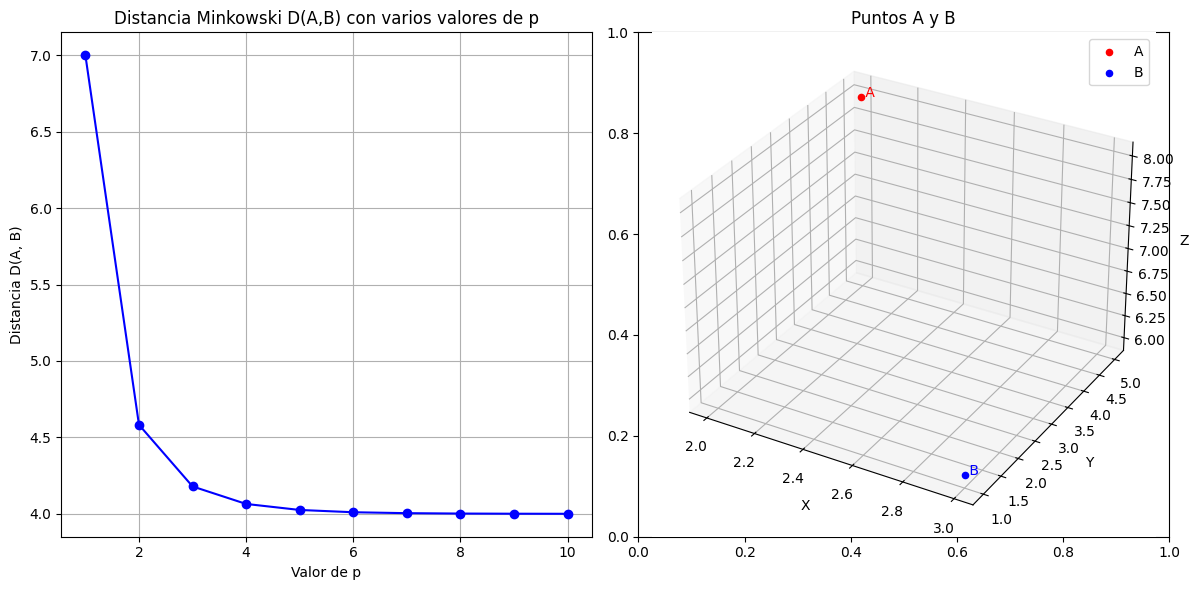

In [48]:
import numpy as np
import matplotlib.pyplot as plt
#https://www.geeksforgeeks.org/maths/minskowski-distance/

# Calculamos la distancia entre dos puntos A y B en función del valor p
# p = 1: Distancia Manhatan (L1)
# P = 2: Distancia Euclidiana (L2)
# P => 3: Norma superior
def minkowski_dist(A, B, p):
    return np.power(np.sum(np.abs(np.array(A) - np.array(B)) ** p), 1 / p)

## Puntos
A = np.array([2, 5, 8])
B = np.array([3, 1, 6])

# Calculamos distancias con varias "p"
p_values = list(range(1, 11))
distances = [minkowski_dist(A, B, p) for p in p_values]

# Mostramos los resultados
for p, d in zip(p_values, distances):
    print(f"Distancia Minkowski para (p={p}): {d:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data
axes[0].plot(p_values, distances, marker='o', linestyle='-', color='b')
axes[0].set_title("Distancia Minkowski D(A,B) con varios valores de p")
axes[0].set_xlabel("Valor de p")
axes[0].set_ylabel("Distancia D(A, B)")
axes[0].grid(True)

# 3D scatter plot of points A and B
axes[1] = fig.add_subplot(1, 2, 2, projection='3d')
axes[1].scatter(A[0], A[1], A[2], color='red', label='A')
axes[1].scatter(B[0], B[1], B[2], color='blue', label='B')
axes[1].text(A[0], A[1], A[2], ' A', color='red')
axes[1].text(B[0], B[1], B[2], ' B', color='blue')
axes[1].set_title("Puntos A y B")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_zlabel("Z")
axes[1].legend()

plt.tight_layout()
plt.show()

# **2. El algoritmo de K-Medias paso a paso**

El algoritmo está en la función que hemos llamado Mi_kmedias(X, k, iter)

Esta función tiene como entradas:
- X: que son los datos
- k: el número de grupos
- iter: el número de ciclos para calcular los centroides.

Como salidas nos devuelve:
- centroides: coordenadas de los centroides final.
- etiquetas: The cluster labels for each data point.
- all_centroides: A list of the cluster centers at each iteration.

También definimos una función para calcular la distancia euclidiana.
- Esta se usa para medir la distancia entre cada punto y los centroides.



In [12]:
# Función para calcular la distancia Euclidiana
def distancia_euclidiana(punto1, punto2):
    #Calculates the Euclidean distance between two points.
    return np.sqrt(np.sum((punto1 - punto2)**2))



# Función que calcula k-medias paso a paso.
def Mi_kmedias(X, k, max_iters=100):
    """
    Calculamos K-Medias -  También graficamos los cambios de los centroides.
    Args:
        X: Datos (numpy array).
        k: Número de centroides.
        max_iters: Número máximo de ciclos.

    Regresa:
        Un arregle tipo tuple:
            - centroides: coordenadas de los centroides final.
            - etiquetas: The cluster labels for each data point.
            - all_centrides: A list of the cluster centers at each iteration.
    """
    # 1. Posición inicial aleatoria.
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroides = X[random_indices, :]

    all_centrides = [centroides.copy()] # Guardamos coordenadas iniciales

    for _ in range(max_iters):
        # 2. Cada punto es asignado a un centroide
        etiquetas = []
        for punto in X:
            distancias = [distancia_euclidiana(punto, centro) for centro in centroides]
            nearest_center_index = np.argmin(distancias)
            etiquetas.append(nearest_center_index)
        etiquetas = np.array(etiquetas)

        # 3. Actualizamos las coordenadas de cada centroide
        new_centroides = []
        for i in range(k):
            cluster_points = X[etiquetas == i]
            if len(cluster_points) > 0:
                new_center = np.mean(cluster_points, axis=0)
                new_centroides.append(new_center)
            else:
                new_centroides.append(centroides[i]) # Si el centroide está vacio se conserva

        new_centroides = np.array(new_centroides)

        # 4. Verificamos convergencia
        if np.allclose(centroides, new_centroides):
            break

        centroides = new_centroides
        all_centrides.append(centroides.copy()) # Guardamos los centroides después de actualizar

    return centroides, etiquetas, all_centrides

## **2.1 Visualización del proceso de agrupamiento.**

Aquí podemos ver cómo evoluciona la ubicación de cada centroide, desde su punto inicial aleatorio hasta el final.

Podemos seleccionar dos tipos de datos:
- make_blobs: son nubes de puntos redondas
- make_moons: son dos grupos con fronteras no separables linealmente.

K-Medias funciona bien cuando las nubes de puntos son redondas y del mismo tamaño, por eso con make_blobs se identifican mejor los grupos.

El caso con make_moons es más complejo y no se identifican bien los dos grupos

### **2.1.1 Visualización de datos tipo make_blobs**

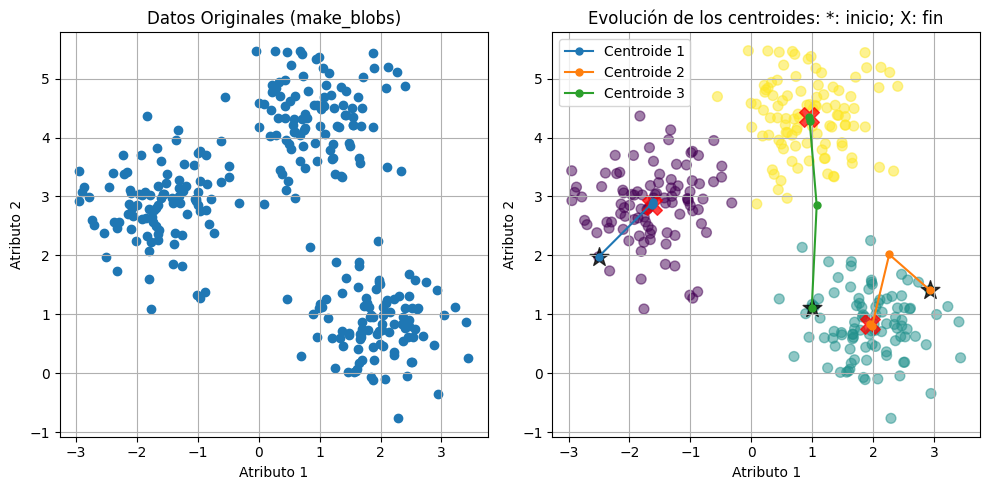

In [34]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X_Data, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
#X_Data, y_true = make_moons(n_samples=200, noise=0.05, random_state=0)


# Re-run K-Means with the modified function to get all_centers
k = 3
centroides, etiquetas, all_centroides = Mi_kmedias(X_Data, k)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
axes[0].scatter(X_Data[:, 0], X_Data[:, 1]) #, c=y_true, s=50, cmap='viridis', alpha=0.5)
axes[0].set_title("Datos Originales (make_blobs)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")
axes[0].grid(True)


# Visualize the data points and centroid evolution
axes[1].scatter(X_Data[:, 0], X_Data[:, 1], c=etiquetas, s=50, cmap='viridis', alpha=0.5)

# Plot the movement of centers
# We transpose all_centers to easily access x and y coordinates for each center across iterations
all_centroides = np.array(all_centroides)

for i in range(k):
    axes[1].plot(all_centroides[:, i, 0], all_centroides[:, i, 1], marker='o', linestyle='-', markersize=5, label=f'Centroide {i+1}')
    # Centroide Inicial '*' negro
    axes[1].scatter(all_centroides[0, i, 0], all_centroides[0, i, 1], c='black', s=200, alpha=0.75, marker='*')

    # Mark the final center position with a larger 'X'
    axes[1].scatter(centroides[i, 0], centroides[i, 1], c='red', s=200, alpha=0.75, marker='X')


axes[1].set_title("Evolución de los centroides: *: inicio; X: fin")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### **2.1.2 Visualización de datos de tipo make_moons**

En este caso los dos grupos tiene una distribución de puntos tal que las distrancias euclidianas con los centoides no permiten seleccionar datos de sólo uno de ellos, sino que mezclan de los dos grupos.

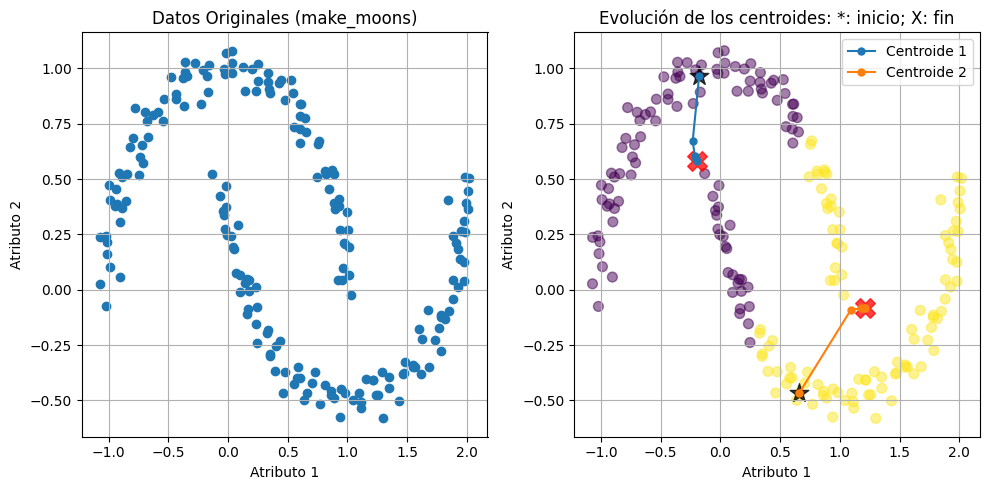

In [24]:
# Generate synthetic data
#X_Data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X_Data, y_true = make_moons(n_samples=200, noise=0.05, random_state=0)


# Re-run K-Means with the modified function to get all_centers
k = 2
centroides, etiquetas, all_centroides = Mi_kmedias(X_Data, k)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
axes[0].scatter(X_Data[:, 0], X_Data[:, 1]) #, c=y_true, s=50, cmap='viridis', alpha=0.5)
axes[0].set_title("Datos Originales (make_moons)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")
axes[0].grid(True)


# Visualize the data points
axes[1].scatter(X_Data[:, 0], X_Data[:, 1], c=etiquetas, s=50, cmap='viridis', alpha=0.5)

# Plot the movement of centers
# We transpose all_centers to easily access x and y coordinates for each center across iterations
all_centroides = np.array(all_centroides)

for i in range(k):
    axes[1].plot(all_centroides[:, i, 0], all_centroides[:, i, 1], marker='o', linestyle='-', markersize=5, label=f'Centroide {i+1}')
    # Centroide Inicial '*' negro
    axes[1].scatter(all_centroides[0, i, 0], all_centroides[0, i, 1], c='black', s=200, alpha=0.75, marker='*')

    # Mark the final center position with a larger 'X'
    axes[1].scatter(centroides[i, 0], centroides[i, 1], c='red', s=200, alpha=0.75, marker='X')


axes[1].set_title("Evolución de los centroides: *: inicio; X: fin")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## **2.2 K-medias con la bibliteca de "sklearn"**



### Ejemplo 1: con datos de make_blobs

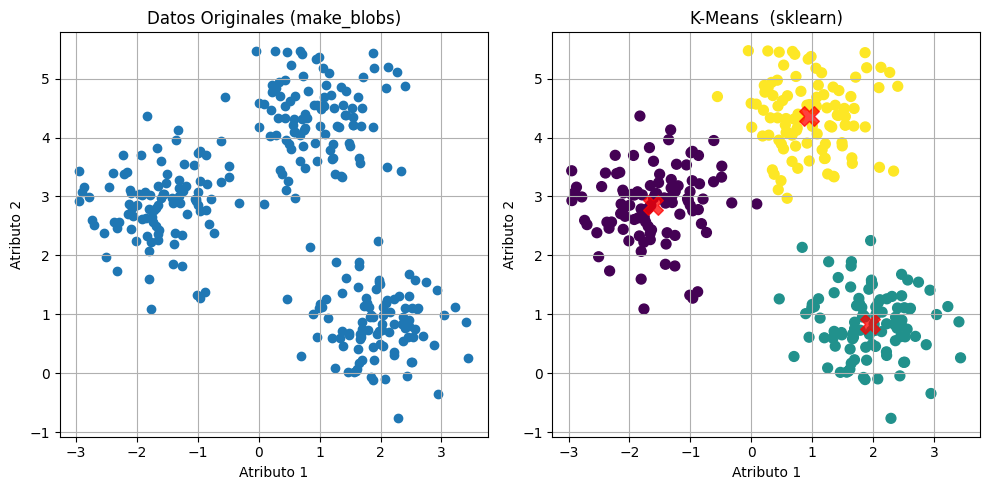

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons

# Datos artificiales
X_blobs, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Usamos kmeans de sklearn
kmeans_blobs = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_blobs.fit(X_blobs)
y_kmeans_blobs = kmeans_blobs.predict(X_blobs)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1]) #, c=y_true, s=50, cmap='viridis', alpha=0.5)
axes[0].set_title("Datos Originales (make_blobs)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")
axes[0].grid(True)


# Grafica del clustering
axes[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans_blobs, s=50, cmap='viridis')
centers_blobs = kmeans_blobs.cluster_centers_
axes[1].scatter(centers_blobs[:, 0], centers_blobs[:, 1], c='red', s=200, alpha=0.75, marker='X')
axes[1].set_title("K-Means  (sklearn)")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Ejemplo 2: Con datos Make_Moon



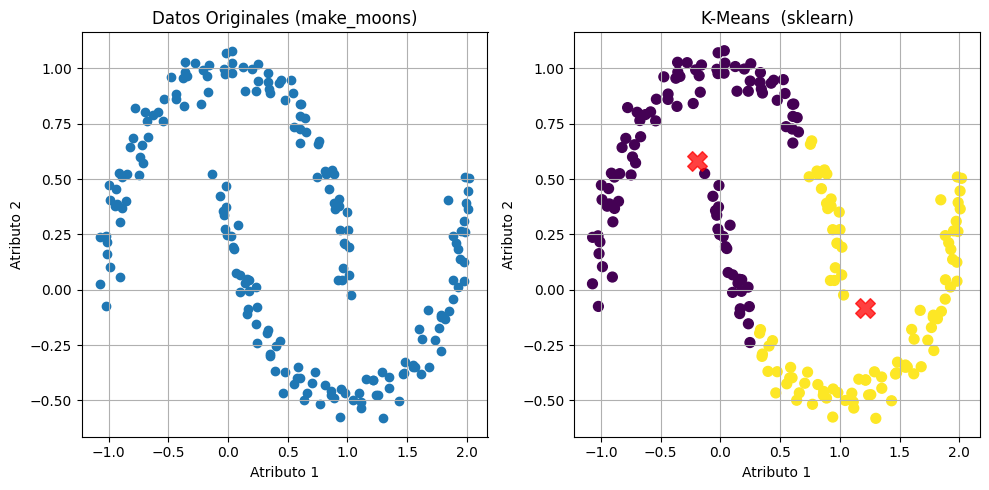

In [33]:
# Generate synthetic data
X_moons, y_true = make_moons(n_samples=200, noise=0.05, random_state=0)

# Apply K-Means
kmeans_moons = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_moons.fit(X_moons)
y_kmeans_moons = kmeans_moons.predict(X_moons)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
axes[0].scatter(X_moons[:, 0], X_moons[:, 1]) #, c=y_true, s=50, cmap='viridis', alpha=0.5)
axes[0].set_title("Datos Originales (make_moons)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")
axes[0].grid(True)


# Visualize the results
axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, s=50, cmap='viridis')
centers_moons = kmeans_moons.cluster_centers_
axes[1].scatter(centers_moons[:, 0], centers_moons[:, 1], c='red', s=200, alpha=0.75, marker='X')
axes[1].set_title("K-Means  (sklearn)")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()